In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('datasets_house_prices.csv')

**Data Exploration and Visualization:**

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2

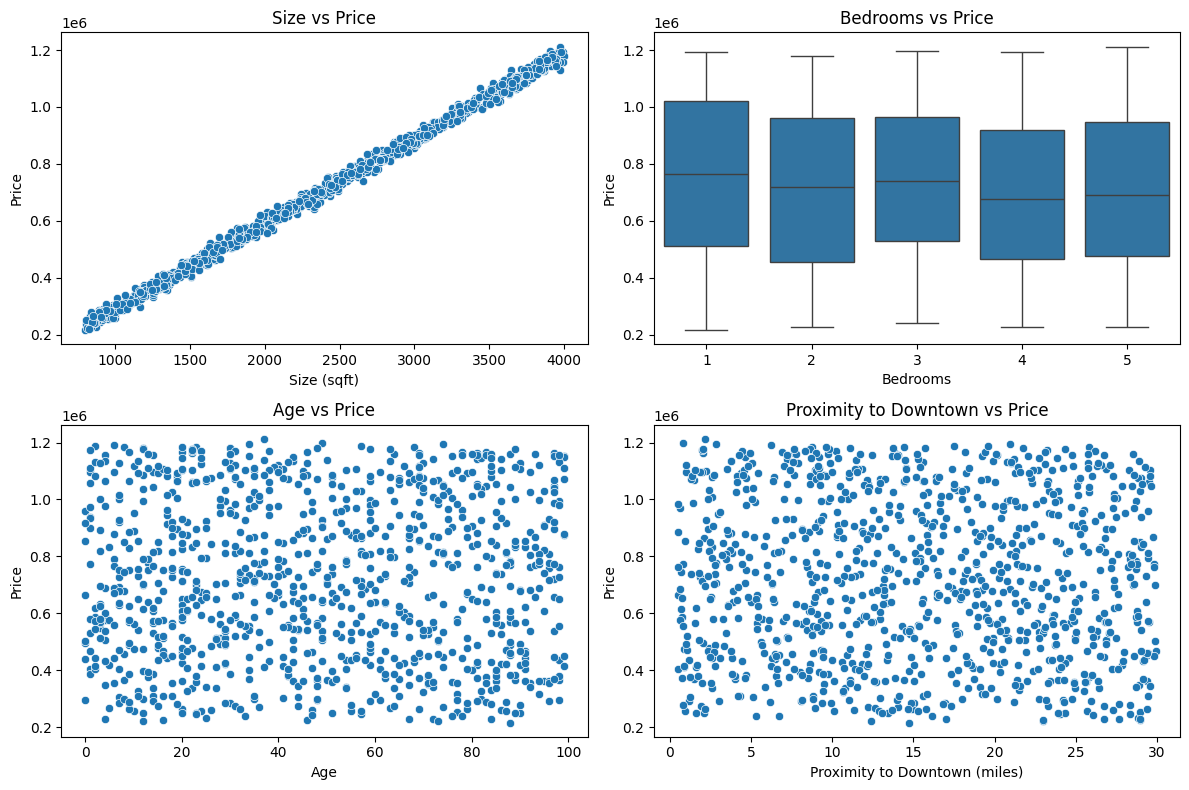

In [4]:
plt.figure(figsize=(12, 8))

# Scatter plot for Size vs Price
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Size (sqft)', y='Price')  # Corrected column name
plt.title('Size vs Price')

# Scatter plot for Bedrooms vs Price
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Bedrooms', y='Price')
plt.title('Bedrooms vs Price')

# Scatter plot for Age vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Age', y='Price')
plt.title('Age vs Price')

# Scatter plot for Proximity to Downtown vs Price
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Proximity to Downtown (miles)', y='Price')
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()

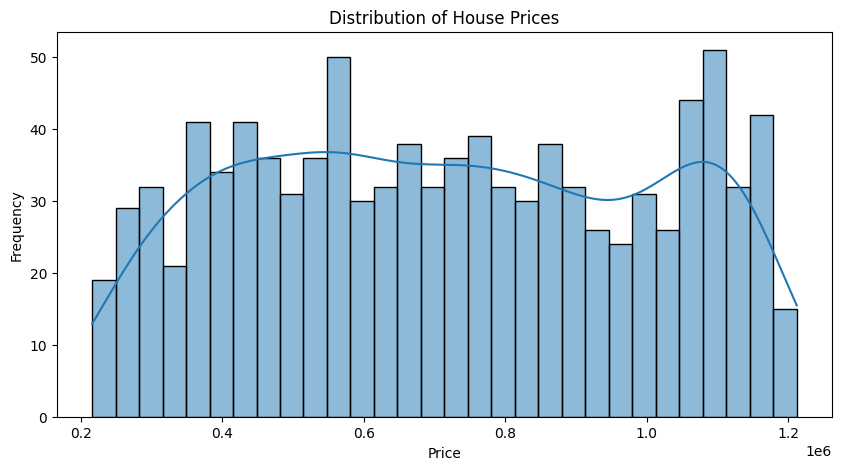

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

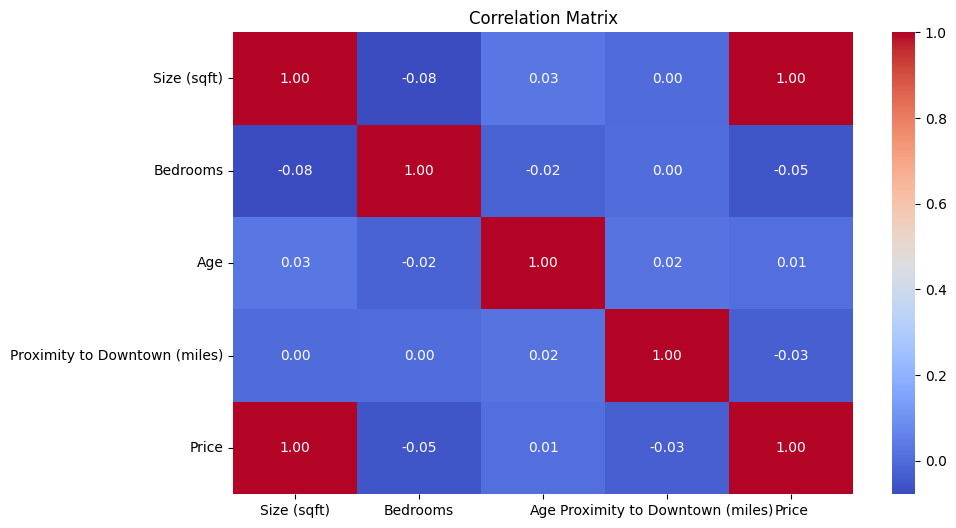

In [6]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Data Preprocessing:**

In [7]:
df.fillna(df.mean(), inplace=True)

In [8]:
print(df.columns)

Index(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)',
       'Price'],
      dtype='object')


In [9]:

scaler = StandardScaler()

X = scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])
y = df['Price']

In [10]:
df.columns = df.columns.str.replace(' ', '')

**Model Development:**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
coefficients = pd.DataFrame(model.coef_, ['Size (sq. ft.)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'], columns=['Coefficient'])
print(coefficients)

                                 Coefficient
Size (sq. ft.)                 278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


**Model Evaluation:**

In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 100214724.63
R-squared: 1.00


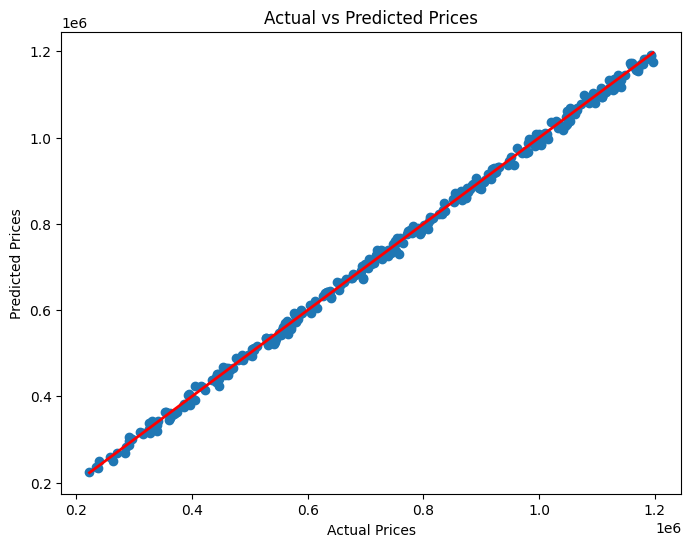

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

**REPORT SUMMARY:**

In [18]:
report = """
In this analysis, we conducted an exploratory data analysis (EDA) to understand the relationships between various
characteristics and home costs. Our data visualization methods included scatter plots, histograms, and correlation matrices.
aided in spotting possible trends.

Next, we handled missing values, normalized the features, and verified that every variable was present in the preprocessed data.
were digitized. Scikit-learn was used to create a multiple regression model, which was then trained on a training
arranged in a 70-30 split.

Metrics like Mean Squared Error (MSE) and R-squared were used to assess the model's performance, and we interpreted
the model coefficients to determine each predictor's importance. An illustration of the anticipated prices in comparison to
The correctness of the model was shown by the actual prices.

Handling any potential outliers in the dataset and ensuring appropriate normalization were challenges encountered during this process.
Techniques for meticulous data preprocessing and visualization were used to overcome these obstacles.

"""
print(report)


In this analysis, we conducted an exploratory data analysis (EDA) to understand the relationships between various 
characteristics and home costs. Our data visualization methods included scatter plots, histograms, and correlation matrices. 
aided in spotting possible trends.

Next, we handled missing values, normalized the features, and verified that every variable was present in the preprocessed data.
were digitized. Scikit-learn was used to create a multiple regression model, which was then trained on a training
arranged in a 70-30 split.

Metrics like Mean Squared Error (MSE) and R-squared were used to assess the model's performance, and we interpreted 
the model coefficients to determine each predictor's importance. An illustration of the anticipated prices in comparison to
The correctness of the model was shown by the actual prices.

Handling any potential outliers in the dataset and ensuring appropriate normalization were challenges encountered during this process.
Techniques fo